In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats


data = pd.read_csv('./data.csv')

x = data['Week'].values
hb = data['HB'].values
hs = data['HS'].values
eb = data['EB'].values
es = data['ES'].values
total = data['Total'].values
print(data)

    Week  HB  HS  EB  ES  Total
0      1  10   5   8  25     48
1      2   7  10   6  19     42
2      3   6   5   5  16     32
3      4   7   4   8   8     27
4      5   2   5   2  14     23
5      6   3   3   1  16     23
6      7   1   2   1  15     19
7      8   3   1   3   9     16
8      9   1   4   1   7     13
9     10   0   2   3   5     10
10    11   1   1   1   5      8
11    12   1   1   4   3      9
12    13   2   0   3   2      7
13    14   2   1   2   2      7
14    15   1   1   0   1      3
15    16   0   0   1   1      2
16    17   2   2   0   0      4
17    18   0   1   0   1      2
18    19   1   2   0   1      4
19    20   0   0   1   0      1


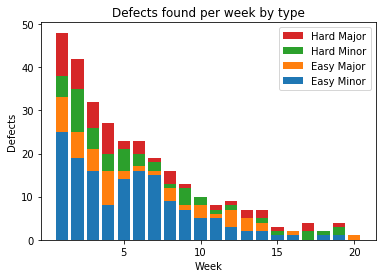

In [5]:
def stacked_histogram():
    plt.figure()
    
    p1 = plt.bar(x, es)
    p2 = plt.bar(x, eb, bottom=es)
    p3 = plt.bar(x, hs, bottom=es+eb)
    p4 = plt.bar(x, hb, bottom=es+eb+hs)

    plt.title('Defects found per week by type')
    plt.ylabel('Defects')
    plt.xlabel('Week')
    plt.legend((p4[0], p3[0], p2[0], p1[0]), ('Hard Major', 'Hard Minor', 'Easy Major', 'Easy Minor'))
    plt.xticks([5,10,15,20])

    plt.show()
    
stacked_histogram()

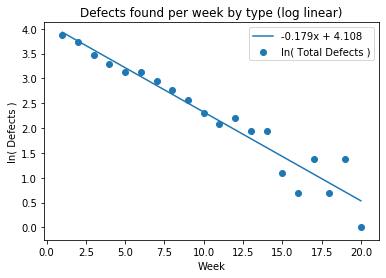

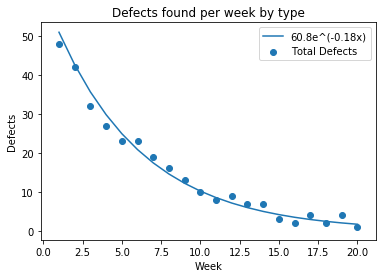

In [7]:

def log_lin_plot(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    y_reg = lambda x : slope * x + intercept

    # Plot points

    plt.figure()

    plt.plot(x, y_reg(x))
    plt.scatter(x, y)
    # Graph labels
    plt.title('Defects found per week by type (log linear)')
    plt.ylabel('ln( Defects )')
    plt.xlabel('Week')
    plt.legend((f'{slope:.3f}x + {intercept:.3f}', 'ln( Total Defects )'))
    plt.show()

log_lin_plot(x, np.log(total))


def log_plot(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    y_reg = lambda x : slope * x + intercept

    # Plot points

    plt.figure()
    plt.plot(x, np.e ** y_reg(x))
    plt.scatter(x, np.e ** y)
    # Graph labels
    plt.title('Defects found per week by type')
    plt.ylabel('Defects')
    plt.xlabel('Week')
    plt.legend((f'{np.e ** intercept:.1f}e^({slope:.2f}x)', 'Total Defects'))

    plt.show()

log_plot(x, np.log(total))